# 2IMM20

## Homework 2B: 
Authors: Group 5

Import the required Python packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

Define the cost function, its gradient and the gradient descent procedure

In [200]:
# Least squares of squares
def dcost_function_lsqsq(X, y, theta):
    N = X.shape[0]
    d = (X@theta-y)
    
    return (1/N) * (d.T@d) * X.T@d

def cost_function_lsqsq(X, y, theta):
    N = X.shape[0]
    d = (X@theta-y)
    
    return (1/(4*N))*(d.T@d)@(d.T@d)

# Least squares of squares
def dcost_function_lsq(X, y, theta):
    N = X.shape[0]
    d = (X@theta-y)
    
    return (1/N) * X.T@d

def cost_function_lsq(X, y, theta):
    N = X.shape[0]
    d = (X@theta-y)
    
    return (1/(2*N))*(d.T@d)

def gradient_descent(cost_fun, X, y, theta0, alpha=0.1, N_it=100, \
                     absTol=1e-3, plot=False, return_history=False):
    """ Optimizes the cost_fun with input X, y with parameters theta
        with the gradient descent algorithm
        
        Parameters:
        cost_fun (function) : Cost function with prototype (X, y, theta)
        X (numpy array)     : Feature matrix X with size n x m
        y (numpy array)     : Feature vector with size n x 1
        theta0 (numpy array): Initial parameter guess vector with size m x 1
        alpha (float)       : Learning rate
        N_it (int)          : Maximum number of iterations
        absTol (float)      : Tolerance of the gradient magnitude
        plot (bool)         : Flag that controls whether to plot the cost function
        return_history (bool): Flag that controls whether to return the history of optimization
        
        Returns:
        if return_history == True:
        theta: numpy array of m x N_it+1 parameter vectors
        J    : numpy array of N_it values of the cost function
        else:
        theta: Optimal parameter vector
        J    : Optimal cost
    
    """
    # Copy the initial parameter guesses
    # and prevent the function from overwriting the vector
    # by deep copying
    theta = deepcopy(theta0)
    
    # Initialization of cost array
    J = np.zeros(N_it)
    
    # Initialization of estimated parameter array / vector
    if return_history: 
        # Note that this approach of storing the history is VERY memory intensive...
        theta = np.zeros((theta0.shape[0], N_it+1))
        theta[..., 0:1] = deepcopy(theta0)
    else:
        theta = deepcopy(theta0)
    
    # Main loop, perform gradient descent
    for i in range(1, N_it+1):
        if return_history:
            # Keep track of gradient
            grad_i = cost_fun[1](X, y, theta[...,i-1:i] )
            
            theta[..., i:i+1] = theta[..., i-1:i] - \
                        alpha*grad_i
            J[i-1] = cost_fun[0](X, y, theta[..., i:i+1])
        else:
            grad_i = alpha*cost_fun[1](X, y, theta)
            
            theta = theta - grad_i
            J[i-1] = cost_fun[0](X, y, theta)
        
        # 
        if i > 1:
            d = grad_i - grad_old
            # Check if the magnitude of the gradient smaller than the absolute tolerance
            # if it is, exit the loop (convergence)
            if (np.sqrt(d.T.dot(d)) < absTol):
                break
        
        # Store as old gradient
        grad_old = grad_i
    
    if plot:
        plt.figure()
        plt.plot(range(0,i), J[:i])
        plt.show()
    
    if not return_history:
        return theta, J[-1], i
    else:
        return theta, J, i
    

Get data and perform standardization

In [3]:
def min_max_scale(vector):
    minV = np.amin(vector)
    maxV = np.amax(vector)
    with np.nditer(vector, op_flags=['readwrite']) as it:
        for value in it:
            value[...] = (value - minV) / (maxV - minV)
    return vector


data_x = np.array([[22.72, 18.14, 11.49, 9.94, 23.54]]).T
data_y = np.array([[453.13, 461.71, 471.08, 473.74, 448.56]]).T

x = min_max_scale(data_x)
y = min_max_scale(data_y)

Perform 100 iterations of gradient descent

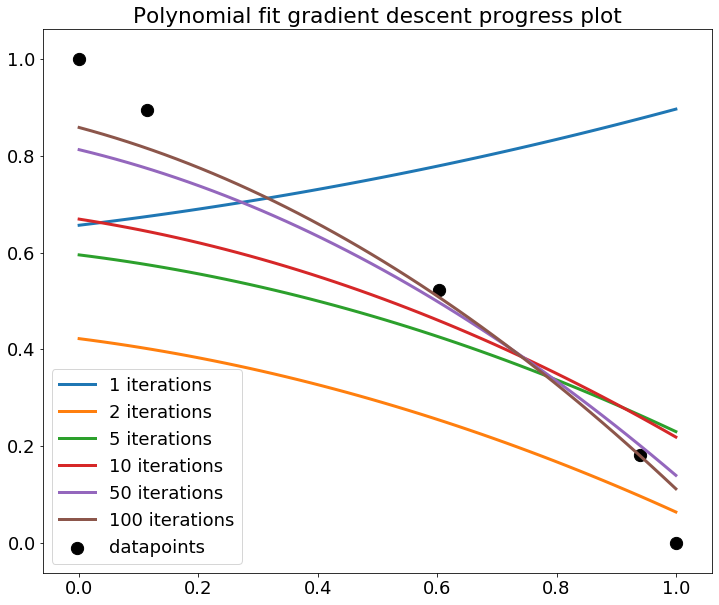

In [201]:
# Initialize theta0 vector
theta0 = np.array([[0,0,0]]).T

# Build feature matrix X
o = np.ones((x.shape[0],1))
X = np.hstack((o, x, x**2))

# Cost function (least squares of squares)
alpha = 0.6
N_it = 2000
theta_est_history, J_history, last_it = \
          gradient_descent([cost_function_lsqsq, dcost_function_lsqsq], X, y, theta0, \
                              N_it=N_it, absTol=1e-7, alpha=alpha, plot=False, return_history=True)

# Iterations at which to obtain model from history
iterations = [1, 2, 5, 10, 50, 100]

xm = np.linspace(min(x), max(x), 50)
o = np.ones((50,1))
Xm = np.hstack((o, xm, xm**2))

plt.figure(figsize=(12, 10))
labels = []

for it in iterations:
    labels.append(str(it) + ' iterations')
    plt.plot(xm, Xm@theta_est_history[...,it], linewidth=3)

plt.scatter(x,y,150,'k')
labels.append('datapoints')

plt.legend(labels)
plt.title('Polynomial fit gradient descent progress plot')
plt.rcParams.update({'font.size': 18})
plt.show()



Plot the model after gradient descent has converged (within the set tolerance, or maximum number of iterations):

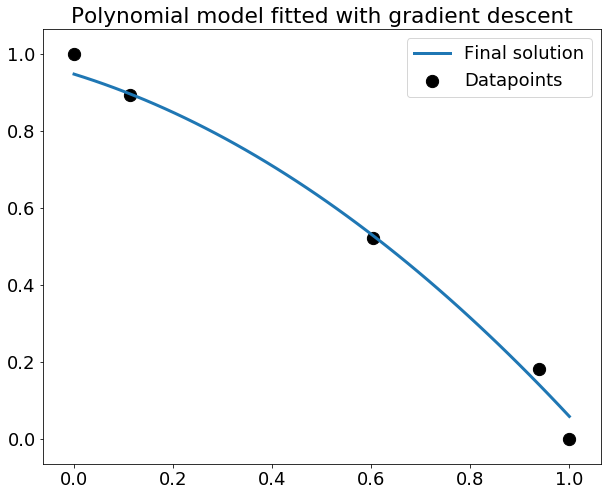

Gradient descent converged after 948 iterations


In [203]:
plt.figure(figsize=(10, 8))
labels = ('Final solution', 'Datapoints')

plt.plot(xm, Xm@theta_est_history[...,last_it], linewidth=3)
plt.scatter(x,y,150,'k')

plt.legend(labels)
plt.title('Polynomial model fitted with gradient descent')
plt.show()

print('Gradient descent converged after ' + str(last_it) + ' iterations')